In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%config Completer.use_jedi = False

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hypertension-risk-model-main/Hypertension-risk-model-main.csv


In [2]:
file_path = '../input/hypertension-risk-model-main/Hypertension-risk-model-main.csv'
hypertension_data = pd.read_csv(file_path)

hypertension_data.head(200)


,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,49,1,9.0,0.0,0,226.0,106.0,71.0,22.89,85.0,57.0,0
196,1,48,1,10.0,0.0,0,308.0,117.0,76.0,30.85,65.0,54.0,0
197,0,55,1,9.0,0.0,0,248.0,157.0,82.5,22.91,89.0,83.0,0
198,0,58,1,5.0,0.0,0,215.0,170.0,86.0,29.06,75.0,98.0,0


In [3]:
# delete rows with missing targets
X_data = hypertension_data.dropna(axis=0, subset=['Risk'], inplace=False)
y_data = X_data.Risk
X_data.drop(['Risk'], axis=1, inplace=True)
X_data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [4]:
X_data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [5]:
# Break off validation data from training data
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_data, y_data, train_size=0.8,
                                                     test_size=0.2, random_state=0)

In [6]:
# In this case, the categorical and numerical columns can be classifed directly:
categorical_cols = ['male', 'currentSmoker', 'diabetes']
numerical_cols = ['age', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI',
                 'heartRate', 'glucose']

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve

#Preprocessing numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('scaler', StandardScaler())
])


# Preprocessing categorical data
categorical_transformer = SimpleImputer(strategy='most_frequent')

#Bundle preprocessing for numerical an categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

#Define model
model = LogisticRegression()

#Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('model', model)
                     ])

# Preprocessing of validation data
clf.fit(X_train, y_train)

# Preprocessing of validation data
preds = clf.predict(X_valid)

print('Accuracy Score', accuracy_score(y_valid, preds))

Accuracy Score 0.8738207547169812


In [8]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [9]:
# Show the confusion matrix
cm = confusion_matrix(y_valid, preds)
print(cm)

[[546  37]
 [ 70 195]]


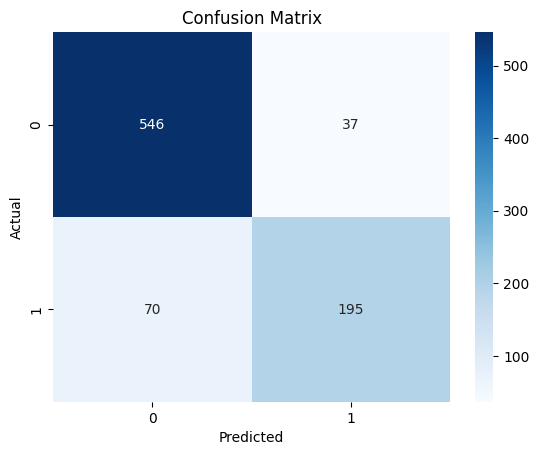

In [10]:
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

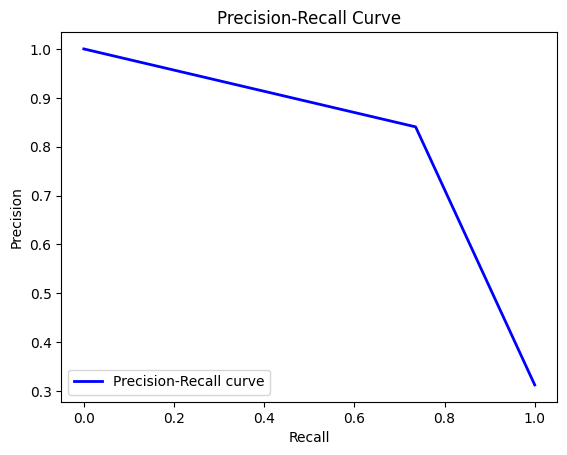

In [11]:
# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_valid, preds)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [12]:
# Now we will use RandomForestClassifier
# Select the model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=1)

#Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('model', random_forest_model)
                     ])
#Train the model
clf.fit(X_train, y_train)

# Preprocessing of validation data
preds = clf.predict(X_valid)

print('Accuracy Score', accuracy_score(y_valid, preds))

Accuracy Score 0.9080188679245284


In [13]:
cm = confusion_matrix(y_valid, preds)
print(cm)

[[539  44]
 [ 34 231]]


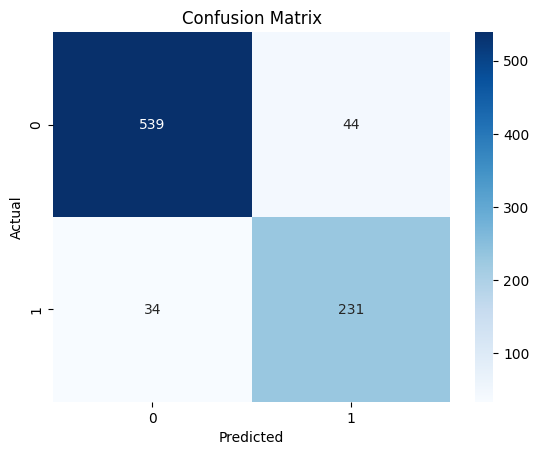

In [14]:
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

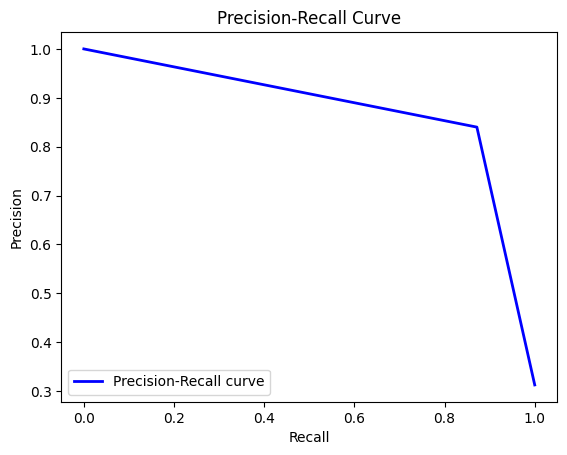

In [15]:
# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_valid, preds)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [16]:
discrete_features = hypertension_data.dtypes == int
discrete_features.drop(['Risk'], inplace=True)
print(discrete_features)

male              True
age               True
currentSmoker     True
cigsPerDay       False
BPMeds           False
diabetes          True
totChol          False
sysBP            False
diaBP            False
BMI              False
heartRate        False
glucose          False
dtype: bool


In [17]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

X_data = hypertension_data.dropna(axis=0, inplace=False)
y_data = X_data.Risk
X_data.drop(['Risk'], axis=1, inplace=True)
mi_scores = make_mi_scores(X_data, y_data, discrete_features)
mi_scores  # show features with their MI scores

/tmp/ipykernel_18/512322355.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_data.drop(['Risk'], axis=1, inplace=True)


sysBP            0.335892
diaBP            0.245886
age              0.052808
BMI              0.042955
BPMeds           0.042575
totChol          0.016091
currentSmoker    0.005564
cigsPerDay       0.003332
diabetes         0.003094
glucose          0.002912
heartRate        0.002643
male             0.000006
Name: MI Scores, dtype: float64

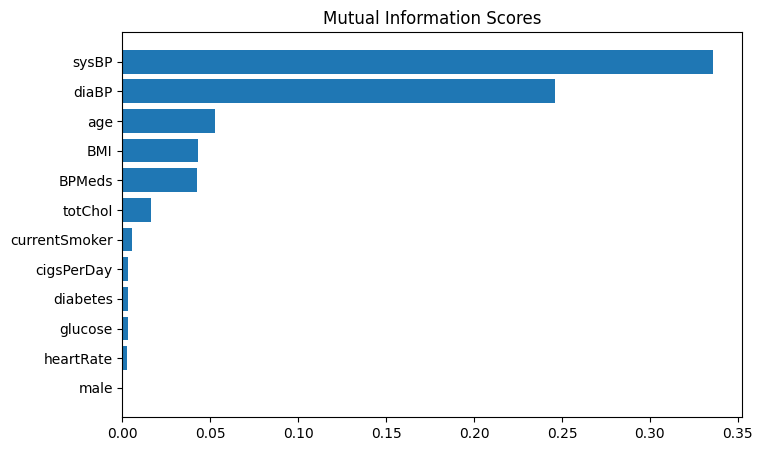

In [18]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)